# 1. Spontaneous Magnetization

In [152]:
from pathlib import Path 

import numpy as np 
import matplotlib.pyplot as plt 

import CompPhy as cp 

plt.style.use("custom.matplotlibrc")

DIR = (Path("./") / "Exercise_6").resolve()

In [156]:
np.random.seed(1)
j_scan = dict()

J = [0.1, 0.2, 0.5 * np.log(1 + np.sqrt(2)), 0.7, 0.8]
def do_j_scan(N: int, SAMPLE_SIZE: int):

    b1 = np.array([-1, 1] * (N // 2))
    b2 = np.array([1, -1] * (N // 2))
    start_cfg = np.array([b1, b2] * (N // 2))

    fig, ax = plt.subplots(1, 5, figsize=(15, 5), sharey=True)

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    for i, j in enumerate(J):
        model = cp.Ising2D(lattice_sites=N, j=j, h=0)

        sample = model.generate_sample(SAMPLE_SIZE, start_cfg)
        m = np.abs(sample.mean(axis = (1, 2)))
        j_scan[f"{N} {j}"] = m

        ax[i].hist(m, density=True, bins=10, label=f"$J = {"{:.2f}".format(j)}$", orientation="horizontal", color=color_cycle[i])
        ax[i].legend(frameon=True)

    fig.supxlabel("PDF")
    # fig.suptitle(f"$N = {N}$")
    fig.savefig(DIR / f"j_scan_{N}.pdf")


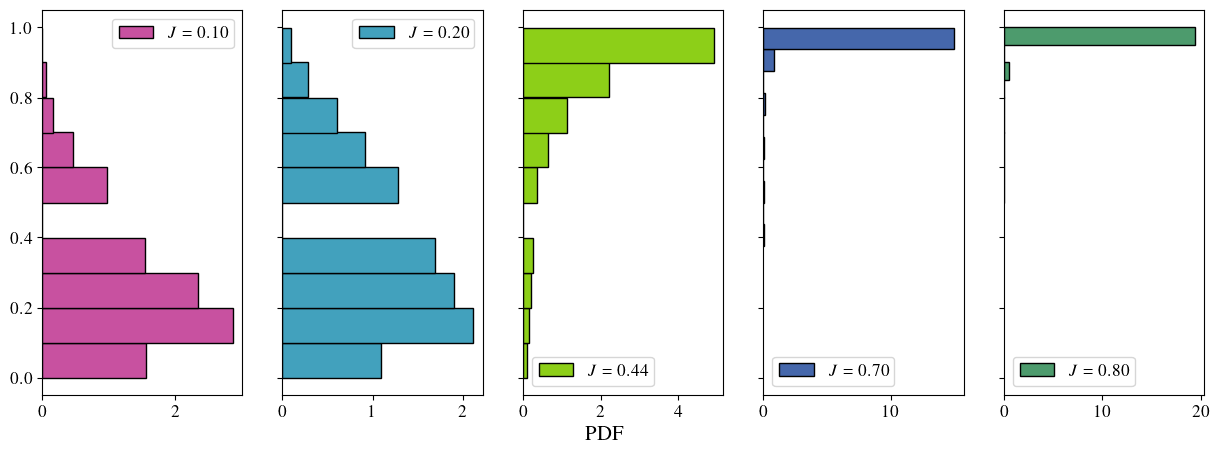

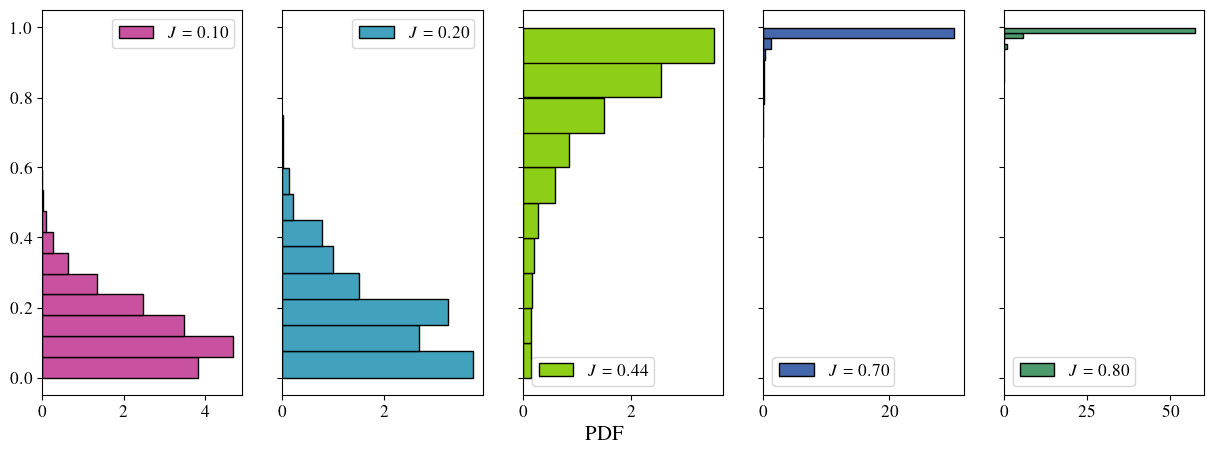

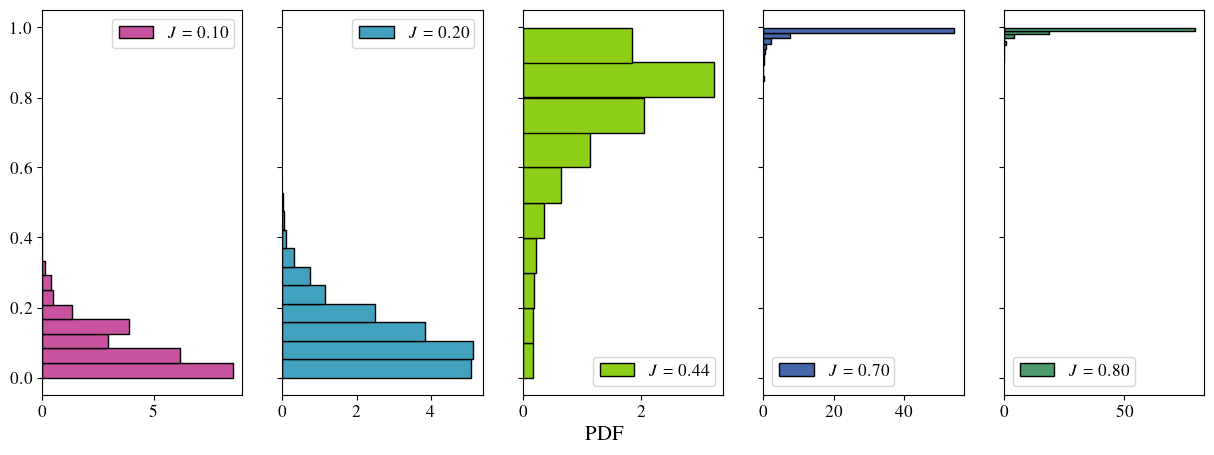

In [157]:
np.random.seed(2)
for N in [4, 8, 12]:
    do_j_scan(N, 10_000)

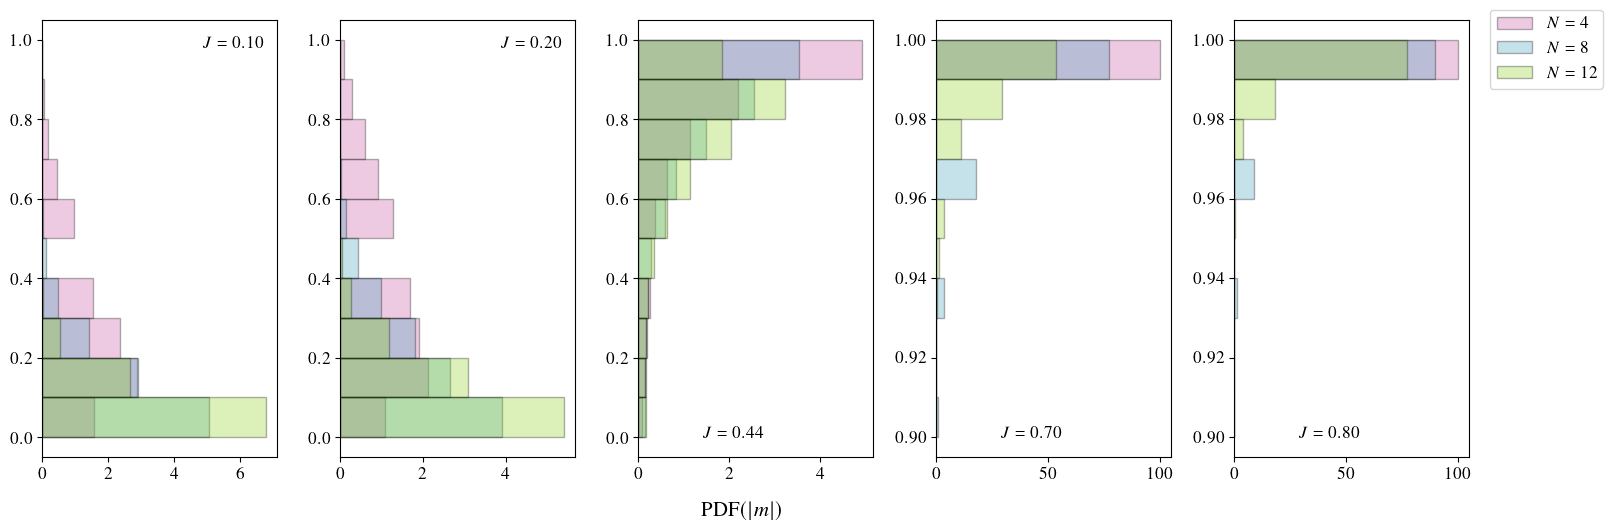

In [165]:
# fig, ax = plt.subplots(1, len(J), figsize=(15, 5))
fig = plt.figure(1, figsize=(15, 5))
handles, labels = [], []
ax = None
for i, j in enumerate(J):
    for N in [4, 8, 12]:
        m = j_scan[f"{N} {j}"]
        if i < 6:
            ax = plt.subplot(1, 5, i + 1)
            rng = (0, 1)
            if i > 2:
                rng = (0.9, 1)
            plt.hist(m, label=f"$N = {N}$", density=True, orientation="horizontal", alpha=0.3, bins=10, range=rng)
            plt.legend(handles=[plt.Line2D([0], [0], label=f"$J = {"{:.2f}".format(j)}$", linestyle="")], frameon=False)
        # else:
        #     plt.subplot(2, 5, i + 1)
        #     plt.hist(m, label=f"$N = {N}$", density=True, orientation="horizontal", alpha=1, histtype="step", bins=15, range=(0.75, 1))
        #     plt.subplot(2, 5, i + 6)
        #     plt.hist(m, label=f"$N = {N}$", density=True, orientation="horizontal", alpha=1, histtype="step", bins=15, range=(-1, -0.75))

fig.tight_layout()
# lgd = fig.legend()
# handles, labels = lgd.legend_handles[:3], lgd.legend_labels[:3]
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.08, 1))
fig.supxlabel(r"$\text{PDF}(\abs{m})$", y = -0.04)
fig.savefig(DIR / "j_scan_compare_n.pdf")
    